# NIH Seizure Prediction using Bayesian Logistic Regression (GLM version) and Pymc3


Code and documentation for my solution (51th place) for the Kaggle Melbourne University AES/MathWorks/NIH Seizure Prediction challenge : https://www.kaggle.com/solomonk

### A 2016 Kaggle competition.

https://www.kaggle.com/c/melbourne-university-seizure-prediction

In [1]:
%reset -f
%matplotlib inline

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'

import pymc3 as pm
sys.path.insert(0,dirToInclude)

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 6)
   

train_dir=TRAIN_DATA_FOLDER_IN_ALL
ieegFeatures= IeegFeatures(train_dir, True)
df_cols_train=ieegFeatures.ieegGenCols()
print len(df_cols_train)
F_NAME_TRAIN= TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL +'-feat_TRAIN_df.csv'
X_df_train=pandas.read_csv(F_NAME_TRAIN, engine='python') 
X_df_train.drop('Unnamed: 0', axis=1, inplace=True)
X_df_train.head(3)


def run_models(df, upper_order=5):
    ''' 
    Convenience function:
    Fit a range of pymc3 models of increasing polynomial complexity. 
    Suggest limit to max order 5 since calculation time is exponential.
    '''
    
    models, traces = OrderedDict(), OrderedDict()

    for k in range(1,upper_order+1):

        nm = 'k{}'.format(k)
        fml = create_poly_modelspec(k)

        with pm.Model() as models[nm]:

            print('\nRunning: {}'.format(nm))
            pm.glm.glm(fml, df, family=pm.glm.families.Normal())

            start_MAP = pm.find_MAP(fmin=fmin_powell, disp=False)
            traces[nm] = pm.sample(2000, start=start_MAP, step=pm.NUTS(), progressbar=True) 
            
    return models, traces

def plot_traces(traces, retain=1000):
    ''' 
    Convenience function:
    Plot traces with overlaid means and values
    '''
    
    ax = pm.traceplot(traces[-retain:], figsize=(12,len(traces.varnames)*1.5),
        lines={k: v['mean'] for k, v in pm.df_summary(traces[-retain:]).iterrows()})

    for i, mn in enumerate(pm.df_summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')
        

train_dir=TRAIN_DATA_FOLDER_IN_ALL
ieegFeatures= IeegFeatures(train_dir, True)
df_cols_train=ieegFeatures.ieegGenCols()
print len(df_cols_train)
F_NAME_TRAIN= TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL +'-feat_TRAIN_df.csv'
X_df_train=pandas.read_csv(F_NAME_TRAIN, engine='python') 
X_df_train.drop('Unnamed: 0', axis=1, inplace=True)
X_df_train.head(3)

Starting:ieegFeatures:2016-09-21 20:57:59.068216
Cols:263
263
Starting:ieegFeatures:2016-09-21 20:58:00.270195
Cols:263
263


,file,id,patient_id,sequence_id,file_size,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,median_11,median_12,median_13,median_14,median_15,median_16,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10,std_11,std_12,std_13,std_14,std_15,std_16,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8,skew_9,skew_10,skew_11,skew_12,skew_13,skew_14,skew_15,skew_16,kurt_1,kurt_2,kurt_3,kurt_4,kurt_5,kurt_6,kurt_7,kurt_8,kurt_9,kurt_10,kurt_11,kurt_12,kurt_13,kurt_14,kurt_15,kurt_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160,result,segment
0,1_548_0.mat,100548,1,92,5980198,-0.031135,-0.050086,0.056264,-0.125906,0.010148,-0.182923,-0.052206,-0.313294,-0.197460,-0.354227,-0.202681,0.123633,0.604957,0.272911,0.401777,0.040232,1.755356,-0.289487,0.721721,1.047945,2.336556,2.122627,0.096654,1.342746,2.780087,6.582189,-4.026581,-8.903570,-10.083026,1.847646,-4.143154,-0.062707,44.370515,51.458254,61.649877,77.645349,57.596783,46.297597,50.104794,42.286228,51.316271,69.608626,85.626431,152.462155,121.430535,88.371428,106.719702,57.031095,1968.742567,2647.951923,3800.707317,6028.800240,3317.389407,2143.467524,2510.490355,1788.125076,2633.359625,4845.360805,7331.885750,23244.708845,14745.374812,7809.509343,11389.094856,3252.545809,-0.299713,0.096344,0.021775,-0.050104,-1.300423,-0.410506,0.123090,-0.345182,-0.401439,-0.540364,0.336145,-0.082761,0.437379,-0.627941,0.388736,-0.034676,0.841001,0.395966,0.683054,0.335079,19.871686,2.602190,1.092800,1.218052,1.013058,0.815220,1.011381,-0.011680,0.370538,2.132940,1.283111,0.510756,-0.272189,-0.199929,-0.087848,0.042947,-0.114184,-0.184363,-0.173677,-0.277009,-0.196882,-0.041190,0.064660,0.343552,0.225719,0.065881,0.179124,-0.104978,-0.506884,-0.477970,-0.320645,-0.361598,-0.406886,-0.499819,-0.445538,-0.446068,-0.328822,-0.318394,-0.266228,-0.064492,-0.150492,-0.295206,-0.199955,-0.422967,-0.642712,-0.727159,-0.651135,-0.695977,-0.585187,-0.781210,-0.653631,-0.745715,-0.495869,-0.545594,-0.584595,-0.531246,-0.352830,-0.525037,-0.433949,-0.734919,-0.885500,-0.907595,-0.811387,-0.843703,-0.664076,-0.931196,-0.784457,-0.885559,-0.778022,-0.671714,-0.690572,-0.758339,-0.521721,-0.667978,-0.555919,-0.914439,-0.781728,-1.000955,-0.998004,-1.069638,-0.757692,-1.139565,-1.032770,-1.096978,-0.881422,-0.844298,-0.847824,-1.050634,-0.762020,-0.805956,-0.827576,-1.183613,-0.968680,-1.110826,-1.038238,-1.345468,-0.868496,-1.340362,-1.370000,-1.386095,-1.258666,-1.003359,-1.048696,-1.307013,-1.024427,-1.015353,-1.130445,-1.428054,0.593032,0.852496,0.929807,1.228960,0.695386,1.044098,0.995766,0.940901,0.833427,0.875397,1.001409,1.503726

In [2]:
# X_df.drop(X_df.head(1).index, inplace=True)
X_df_train_SINGLE=X_df_train

# Numeric
import numpy as np
answers_1_SINGLE = list (X_df_train_SINGLE['result'].values)
answers_1_SINGLE = map(int, answers_1_SINGLE)
answers_1_SINGLE = np.asarray(answers_1_SINGLE)

# X_df_train_SINGLE = X_df_train_SINGLE.drop('response', axis=1)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)

# Build pasty expression
glm_factor=list(X_df_train_SINGLE.columns.values)
glm_factor= list(['var_1', 'mean_9', 'psd_96', 'var_15', 'var_11', 'psd_76', 'psd_37', 'var_6', 'var_13', 'psd_127', 'psd_17', 'psd_50', 'psd_21', 'std_15', 'mean_14', 'psd_95', 'psd_23', 'psd_31', 'psd_52', 'mean_11', 'psd_128', 'psd_92', 'psd_26', 'var_10', 'var_7', 'var_5', 'psd_115', 'psd_32', 'psd_159', 'psd_80', 'psd_54', 'var_2', 'psd_13', 'var_8', 'psd_39', 'std_6', 'std_1', 'psd_150', 'psd_43', 'psd_24', 'std_5', 'psd_73', 'psd_77', 'var_3', 'psd_100', 'psd_108', 'psd_133', 'psd_66', 'psd_42', 'psd_22'])
# glm_factor.remove('result')
# print glm_factor
s='result ~ '

for item in glm_factor:
    s += item + ' + '
s=s[:-2]
print s    


result ~ var_1 + mean_9 + psd_96 + var_15 + var_11 + psd_76 + psd_37 + var_6 + var_13 + psd_127 + psd_17 + psd_50 + psd_21 + std_15 + mean_14 + psd_95 + psd_23 + psd_31 + psd_52 + mean_11 + psd_128 + psd_92 + psd_26 + var_10 + var_7 + var_5 + psd_115 + psd_32 + psd_159 + psd_80 + psd_54 + var_2 + psd_13 + var_8 + psd_39 + std_6 + std_1 + psd_150 + psd_43 + psd_24 + std_5 + psd_73 + psd_77 + var_3 + psd_100 + psd_108 + psd_133 + psd_66 + psd_42 + psd_22 


In [3]:
X_df_train_SINGLE.head(3)

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,median_11,median_12,median_13,median_14,median_15,median_16,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10,std_11,std_12,std_13,std_14,std_15,std_16,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8,skew_9,skew_10,skew_11,skew_12,skew_13,skew_14,skew_15,skew_16,kurt_1,kurt_2,kurt_3,kurt_4,kurt_5,kurt_6,kurt_7,kurt_8,kurt_9,kurt_10,kurt_11,kurt_12,kurt_13,kurt_14,kurt_15,kurt_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160,result,segment
0,-0.031135,-0.050086,0.056264,-0.125906,0.010148,-0.182923,-0.052206,-0.313294,-0.197460,-0.354227,-0.202681,0.123633,0.604957,0.272911,0.401777,0.040232,1.755356,-0.289487,0.721721,1.047945,2.336556,2.122627,0.096654,1.342746,2.780087,6.582189,-4.026581,-8.903570,-10.083026,1.847646,-4.143154,-0.062707,44.370515,51.458254,61.649877,77.645349,57.596783,46.297597,50.104794,42.286228,51.316271,69.608626,85.626431,152.462155,121.430535,88.371428,106.719702,57.031095,1968.742567,2647.951923,3800.707317,6028.800240,3317.389407,2143.467524,2510.490355,1788.125076,2633.359625,4845.360805,7331.885750,23244.708845,14745.374812,7809.509343,11389.094856,3252.545809,-0.299713,0.096344,0.021775,-0.050104,-1.300423,-0.410506,0.123090,-0.345182,-0.401439,-0.540364,0.336145,-0.082761,0.437379,-0.627941,0.388736,-0.034676,0.841001,0.395966,0.683054,0.335079,19.871686,2.602190,1.092800,1.218052,1.013058,0.815220,1.011381,-0.011680,0.370538,2.132940,1.283111,0.510756,-0.272189,-0.199929,-0.087848,0.042947,-0.114184,-0.184363,-0.173677,-0.277009,-0.196882,-0.041190,0.064660,0.343552,0.225719,0.065881,0.179124,-0.104978,-0.506884,-0.477970,-0.320645,-0.361598,-0.406886,-0.499819,-0.445538,-0.446068,-0.328822,-0.318394,-0.266228,-0.064492,-0.150492,-0.295206,-0.199955,-0.422967,-0.642712,-0.727159,-0.651135,-0.695977,-0.585187,-0.781210,-0.653631,-0.745715,-0.495869,-0.545594,-0.584595,-0.531246,-0.352830,-0.525037,-0.433949,-0.734919,-0.885500,-0.907595,-0.811387,-0.843703,-0.664076,-0.931196,-0.784457,-0.885559,-0.778022,-0.671714,-0.690572,-0.758339,-0.521721,-0.667978,-0.555919,-0.914439,-0.781728,-1.000955,-0.998004,-1.069638,-0.757692,-1.139565,-1.032770,-1.096978,-0.881422,-0.844298,-0.847824,-1.050634,-0.762020,-0.805956,-0.827576,-1.183613,-0.968680,-1.110826,-1.038238,-1.345468,-0.868496,-1.340362,-1.370000,-1.386095,-1.258666,-1.003359,-1.048696,-1.307013,-1.024427,-1.015353,-1.130445,-1.428054,0.593032,0.852496,0.929807,1.228960,0.695386,1.044098,0.995766,0.940901,0.833427,0.875397,1.001409,1.503726,1.099418,0.964035,1.132251,1.183880,0.358337,0.574454,0.697010,0.824415,

In [4]:
niter=100
with pm.Model() as logistic_model:
    pm.glm.glm(s, X_df_train_SINGLE, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(niter, pm.NUTS(), progressbar=True)

Applied logodds-transform to p and added transformed p_logodds_ to model.
 [-----------------100%-----------------] 100 of 100 complete in 1027.2 sec

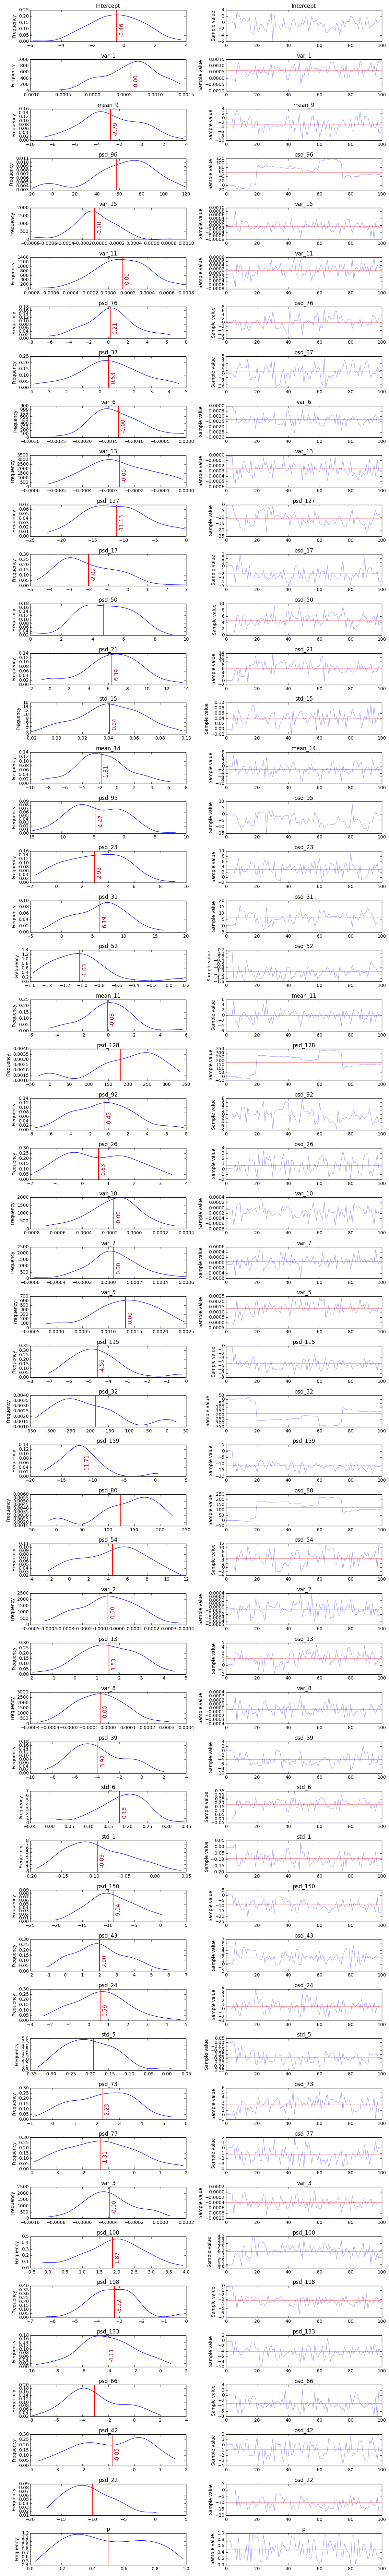

In [5]:
plot_traces(trace_logistic_model, retain=100)
# pd.scatter_matrix(trace_logistic_model[-100:], diagonal='kde');

In [6]:
# predict

df_trace_logistic_model = pm.trace_to_dataframe(trace_logistic_model[niter//2:])
w_theta = df_trace_logistic_model[glm_factor].mean(0)

df_trace_logistic_model.to_csv("df_trace_logistic_model.csv")
w_theta.to_csv("w_theta.csv")

w_intercept=df_trace_logistic_model['Intercept'].mean(0)

# df_trace_logistic_model

import numpy as np
def predict(new_observation, intercept=w_intercept, theta=w_theta):
    """Predict gender given weight (w) and height (h) values."""
    v = intercept + np.inner(new_observation, w_theta)
    return np.exp(v)/(1+np.exp(v))    

# print w_theta
# print w_intercept

## Submition

In [7]:
test_dir=TEST_DATA_FOLDER_IN_ALL
ieegFeatures= IeegFeatures(test_dir, False)
df_cols_test=ieegFeatures.ieegGenCols()
print len(df_cols_test)
F_NAME_TEST= TEST_FEAT_BASE + TEST_PREFIX_ALL +'-feat_TEST_df.csv'
X_df_TEST=pandas.read_csv(F_NAME_TEST, engine='python') 
X_df_TEST.drop('Unnamed: 0', axis=1, inplace=True)
# X_df_TEST.drop('id', axis=1, inplace=True)
X_df_TEST.drop('file', axis=1, inplace=True)
X_df_TEST.drop('patient_id', axis=1, inplace=True)
# X_df_TEST.drop('file_size', axis=1, inplace=True)
# X_df_TEST.drop('sequence_id', axis=1, inplace=True)
X_df_TEST.head(3)


Starting:ieegFeatures:2016-09-21 21:58:30.246600
Cols:259
259


,id,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,median_11,median_12,median_13,median_14,median_15,median_16,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10,std_11,std_12,std_13,std_14,std_15,std_16,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8,skew_9,skew_10,skew_11,skew_12,skew_13,skew_14,skew_15,skew_16,kurt_1,kurt_2,kurt_3,kurt_4,kurt_5,kurt_6,kurt_7,kurt_8,kurt_9,kurt_10,kurt_11,kurt_12,kurt_13,kurt_14,kurt_15,kurt_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160
0,301102,-0.017945,0.089617,0.047301,-0.146958,-0.006874,0.025264,-0.023878,-0.044395,-0.112528,-0.044937,0.034505,-0.041208,0.102830,0.063297,0.131359,-0.055453,1.326847,0.623930,-3.421426,-2.078476,-0.006715,0.225662,0.287039,0.396347,0.082155,-1.158971,0.028653,-1.800641,0.908967,0.578797,0.038484,1.219349,32.083565,25.366687,27.232595,30.240211,16.646028,21.900140,20.746158,23.152848,36.692922,26.691117,23.141490,29.244697,28.029432,33.276343,23.616634,25.066890,1029.355121,643.468792,741.614210,914.470372,277.090251,479.616139,430.403060,536.054348,1346.370559,712.415721,535.528540,855.252286,785.649038,1107.314983,557.745417,628.348973,-0.561581,-0.470165,0.373629,0.185541,-0.042976,-0.295730,-0.134556,-0.204870,-0.500005,0.157374,0.058737,-0.179229,-0.384910,-0.373433,0.043628,-0.716001,3.291876,3.479588,0.128682,0.335713,1.965408,4.498333,3.101722,1.835232,4.395772,1.520797,0.947642,2.049366,2.473543,2.697417,1.322876,2.924098,-0.582465,-0.731299,-0.766641,-0.679971,-0.797597,-0.660742,-0.653982,-0.661046,-0.511656,-0.610761,-0.726120,-0.691300,-0.609199,-0.590978,-0.662454,-0.638831,-0.580226,-0.637729,-0.790011,-0.741522,-0.844277,-0.745957,-0.743576,-0.670201,-0.457825,-0.670972,-0.746964,-0.681720,-0.610905,-0.542799,-0.715663,-0.679827,-0.650428,-0.764821,-0.939440,-0.968689,-0.970808,-0.773926,-0.959360,-0.897978,-0.507937,-0.665723,-0.724347,-0.694886,-0.628221,-0.525930,-0.801558,-0.703747,-0.698827,-0.776960,-0.961023,-1.054877,-1.035150,-0.808599,-1.041837,-1.017863,-0.716843,-0.828229,-0.879032,-0.870429,-0.843791,-0.747737,-0.904978,-0.902307,-0.759484,-0.923842,-1.077269,-1.127812,-1.238303,-1.155882,-1.226336,-1.189257,-0.900528,-0.971905,-0.993906,-1.059362,-0.956151,-0.816705,-0.964121,-1.011441,-1.118505,-1.276737,-1.330226,-1.282228,-1.498192,-1.496972,-1.494491,-1.473892,-1.196956,-1.244788,-1.276628,-1.416931,-1.303321,-1.198564,-1.315547,-1.410684,0.320440,0.334091,0.418944,0.518222,0.551494,0.633026,0.686056,0.647616,0.512271,0.476496,0.386536,0.511042,0.486733,0.375973,0.442763,0.527885,0.322680,0.427661,0.395574,0.456671,0.504814,0.547811,0.5

In [ ]:
#------------------------------------------------------------------------------#
now = datetime.now()
import dis
sub_file = 'submission' + 'mcmc_all_'  + str(len(df_cols_train)) + str(datetime.now().strftime("%Y-%m-%d-%H-%M")) + '.csv'

r= pandas.DataFrame.from_csv('sample_submission.csv')
print('Writing submission: ', sub_file)
f = open(sub_file, 'w') # append mode
f.write('File,Class\n')
total = 0

for index, row in r.iterrows():            
    id_str= index     
    arr = id_str.split("_")
    patient = int(arr[0])        
    new_id= ieegFeatures.getIdFromFileName(id_str) 
#     print str(new_id)
    
    X_df_single_row=X_df_TEST.loc[X_df_TEST['id'] == new_id]
    X_df_single_row.drop('id', axis=1, inplace=True)
    X_df_single_row= X_df_single_row[glm_factor]        
#     X_df_single_row.drop('file', axis=1, inplace=True)
#     X_df_single_row.drop('patient_id', axis=1, inplace=True)                    
    X_df_single_row = np.asarray(X_df_single_row)        
#         print c_pred
    str1 = id_str + ',' + str(predict (tuple (X_df_single_row)[0])) + '\n'  
#     print str1
    
    f.write(str1)
    
f.close()

print('Done writing submission: ', sub_file)


('Writing submission: ', 'submissionmcmc_all_2632016-09-21-21-58.csv')
